In [1]:
# Plotting inline
% matplotlib inline

# Import the necessary modules
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.api.types as pdt
import statsmodels as sm
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [2]:
# Define some variables that will be reused
# DKO stands for double knock-out, which in the plots is labelled as dy3K/miR-21
gen3k = ['wt', 'mir-21', 'dy3k', 'dko']
ticks3k = ['WT', 'miR-21', '$dy^{3K}/dy^{3K}$', '$dy^{3K}$/miR-21']
cats3k = pdt.CategoricalDtype(categories=gen3k, ordered=True)
gen2j = ['wt', 'mir-21', 'dy2j', 'dko']
ticks2j = ['WT', 'miR-21', '$dy^{2J}/dy^{2J}$', '$dy^{2J}$/miR-21']
cats2j = pdt.CategoricalDtype(categories=gen2j, ordered=True)

In [3]:
# We'll first analyse the body weight data from our two mouse models, dy3K and dy2J
wgt3k = pd.read_table('Dados/body_weight_3k.tsv', header=0, decimal=',')
# Explicitly setting the genotype as a category
wgt3k.genotype = wgt3k.genotype.astype(cats3k)

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat    pval  pval_corr reject
----------------------------------------------
 dko    dy3k   0.2106  0.834     1.0    False 
 dko   mir-21 -15.8748  0.0      0.0     True 
 dko     wt   -10.8971  0.0      0.0     True 
 dy3k  mir-21 -16.5686  0.0      0.0     True 
 dy3k    wt   -11.2985  0.0      0.0     True 
mir-21   wt    2.9956  0.0041   0.0248   True 
----------------------------------------------


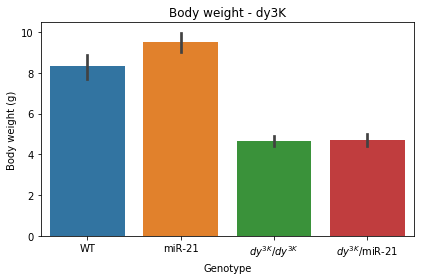

In [4]:
# Crete a multiple comparison object for further statistical testing
mcv3 = MultiComparison(wgt3k.weight, wgt3k.genotype)
# Compare using t-test
print(mcv3.allpairtest(sp.stats.ttest_ind)[0])
# Visualise the data
sns.barplot(x='genotype', y='weight', data=wgt3k)
plt.ylabel('Body weight (g)')
plt.xlabel('Genotype')
plt.title('Body weight - dy3K')
plt.xticks(range(4), ticks3k)
plt.tight_layout()
plt.show();

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 dko    dy2j   -0.017 0.9866    1.0    False 
 dko   mir-21 -1.8489 0.0698   0.4185  False 
 dko     wt   -3.0958 0.0033    0.02    True 
 dy2j  mir-21 -1.9446 0.0566   0.3396  False 
 dy2j    wt   -3.2326 0.0022   0.0132   True 
mir-21   wt   -2.0061 0.0481   0.2888  False 
---------------------------------------------


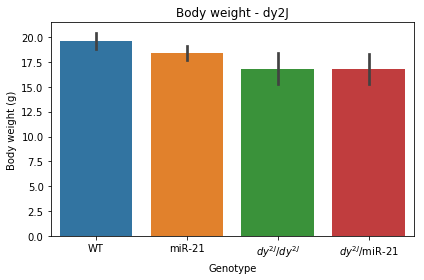

In [5]:
# Now the same thing for dy2J mice
wgt2j = pd.read_table('Dados/body_weight_2j.tsv', header=0, decimal=',')
wgt2j.genotype = wgt2j.genotype.astype(cats2j)
mcv2 = MultiComparison(wgt2j.weight, wgt2j.genotype)
print(mcv2.allpairtest(sp.stats.ttest_ind)[0])
sns.barplot(x='genotype', y='weight', data=wgt2j)
plt.ylabel('Body weight (g)')
plt.xlabel('Genotype')
plt.title('Body weight - dy2J')
plt.xticks(range(4), ticks2j)
plt.tight_layout()
plt.show();

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 dko    dy3k  -1.7296 0.1273   0.764   False 
 dko   mir-21  5.4926 0.0006   0.0035   True 
 dko     wt    5.3735 0.0007   0.004    True 
 dy3k  mir-21  4.6233 0.0024   0.0145   True 
 dy3k    wt    4.3885 0.0032   0.0192   True 
mir-21   wt   -0.8805 0.4043    1.0    False 
---------------------------------------------


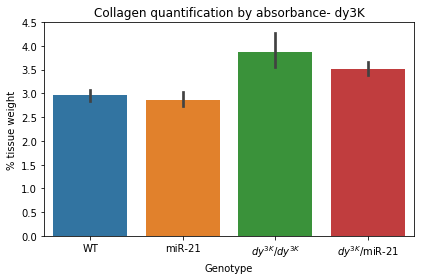

In [6]:
# Collagen quantification by absorbance
col3k = pd.read_table('Dados/absorbance_3k.tsv', header=0, index_col=0, decimal=',', usecols=['id', 'genotype', 'pct_coll'])
col3k.genotype = col3k.genotype.astype(cats3k)
mcc3 = MultiComparison(col3k.pct_coll, col3k.genotype)
print(mcc3.allpairtest(sp.stats.ttest_ind)[0])
sns.barplot(x='genotype', y=col3k.pct_coll * 100, data=col3k)
plt.ylabel('% tissue weight')
plt.xlabel('Genotype')
plt.title('Collagen quantification by absorbance- dy3K')
plt.xticks(range(4), ticks3k)
plt.tight_layout()
plt.show();

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 dko    dy2j  -2.3183 0.049    0.2943  False 
 dko   mir-21  3.9134 0.0045   0.0268   True 
 dko     wt    2.8728 0.0207   0.1244  False 
 dy2j  mir-21  7.4715 0.0001   0.0004   True 
 dy2j    wt    5.2465 0.0008   0.0047   True 
mir-21   wt   -0.0641 0.9505    1.0    False 
---------------------------------------------


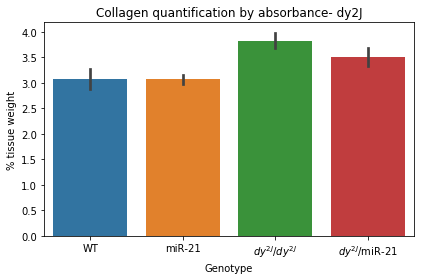

In [7]:
# Same thing for dy2J mice
col2j = pd.read_table('Dados/absorbance_2j.tsv', header=0, index_col=0, decimal=',', usecols=['id', 'genotype', 'pct_coll'])
col2j.genotype = col2j.genotype.astype(cats2j)
mcc2 = MultiComparison(col2j.pct_coll, col2j.genotype)
print(mcc2.allpairtest(sp.stats.ttest_ind)[0])
sns.barplot(x = 'genotype', y = col2j.pct_coll * 100, data = col2j)
plt.ylabel('% tissue weight')
plt.xlabel('Genotype')
plt.title('Collagen quantification by absorbance- dy2J')
plt.xticks(range(4), ticks2j)
plt.tight_layout()
plt.show();

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 dko    dy3k   1.2214  0.25     1.0    False 
 dko   mir-21  4.3183 0.0015   0.0091   True 
 dko     wt    3.9878 0.0026   0.0154   True 
 dy3k  mir-21  3.9762 0.0026   0.0157   True 
 dy3k    wt    3.4982 0.0057   0.0345   True 
mir-21   wt   -0.2219 0.8288    1.0    False 
---------------------------------------------


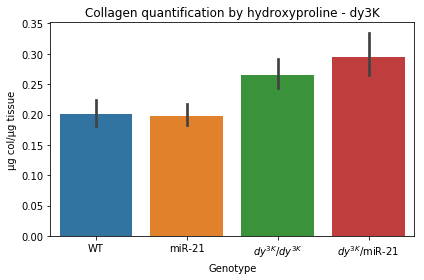

In [8]:
# We've also quantified it by hydroxyproline assay
hyd3k = pd.read_table('Dados/hydroxiproline_3k.tsv', header=0, index_col=0, decimal=',')
hyd3k.genotype = hyd3k.genotype.astype(cats3k)
mch3 = MultiComparison(hyd3k.regression, hyd3k.genotype)
print(mch3.allpairtest(sp.stats.ttest_ind)[0])
sns.barplot(x='genotype', y='regression', data=hyd3k)
plt.ylabel('µg col/µg tissue')
plt.xlabel('Genotype')
plt.title('Collagen quantification by hydroxyproline - dy3K')
plt.xticks(range(4), ticks3k)
plt.tight_layout()
plt.show();

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
 dko    dy2j  0.2598 0.7995    1.0    False 
 dko   mir-21 2.4734 0.0293   0.1759  False 
 dko     wt   1.8484 0.0874   0.5244  False 
 dy2j  mir-21 2.6371 0.0217   0.1301  False 
 dy2j    wt   1.8617 0.0854   0.5124  False 
mir-21   wt   -1.525 0.1512   0.9073  False 
--------------------------------------------


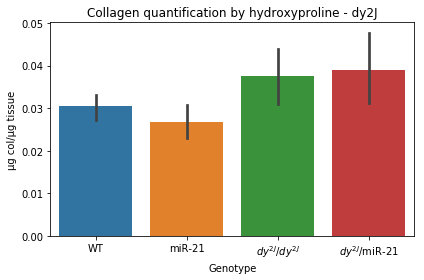

In [9]:
# dy2J mice
hyd2j = pd.read_table('Dados/hydroxiproline_2j.tsv', header=0, index_col=0, decimal=',')
hyd2j.genotype = hyd2j.genotype.astype(cats2j)
mch2 = MultiComparison(hyd2j.regression, hyd2j.genotype)
print(mch2.allpairtest(sp.stats.ttest_ind)[0])
sns.barplot(x = 'genotype', y = 'regression', data = hyd2j)
plt.ylabel('µg col/µg tissue')
plt.xlabel('Genotype')
plt.title('Collagen quantification by hydroxyproline - dy2J')
plt.xticks(range(4), ticks2j)
plt.tight_layout()
plt.show();

Ttest_indResult(statistic=-3.7187869507316416, pvalue=0.007467980235003018)


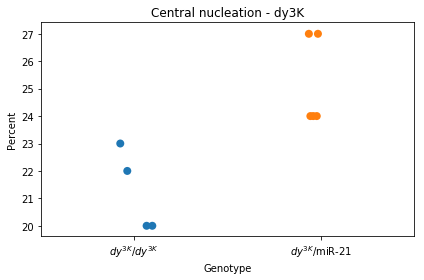

In [10]:
# Central nucleation
cn3k = pd.read_table('Dados/central_nucleation_3k.tsv', header=0)
# Given that we only have 2 groups here we can use a t-test right away
print(sp.stats.ttest_ind(cn3k.percentage[:4], cn3k.percentage[4:]))
sns.stripplot(x='genotype', y='percentage', data=cn3k, order=['dy3k', 'dko'], jitter=True, size=8)
plt.ylabel('Percent')
plt.xlabel('Genotype')
plt.title('Central nucleation - dy3K')
plt.xticks([0, 1], ticks3k[2:])
plt.tight_layout()
plt.show();

Ttest_indResult(statistic=1.9481920325186894, pvalue=0.0993075720382003)


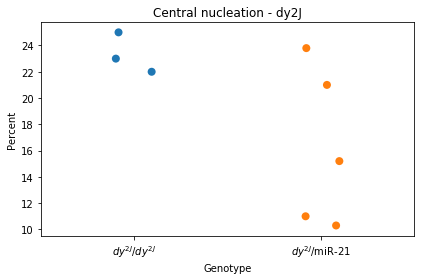

In [11]:
# dy2J
cn2j = pd.read_table('Dados/central_nucleation_2j.tsv', header=0, decimal=',')
print(sp.stats.ttest_ind(cn2j.percentage[:3], cn2j.percentage[3:]))
sns.stripplot(x='genotype', y='percentage', data=cn2j, order=['dy2j', 'dko'], jitter=True, size=8)
plt.ylabel('Percent')
plt.xlabel('Genotype')
plt.title('Central nucleation - dy2J')
plt.xticks([0, 1], ticks2j[2:])
plt.tight_layout()
plt.show();

In [12]:
# Finally, we have grip strength data from dy2J mice
grip = pd.read_table('Dados/norm_grip_strength.tsv', header=0, decimal=',')
grip.genotype = grip.genotype.astype(cats2j)

# Body weight-normalised strength
mcgn = MultiComparison(grip.strength, grip.genotype)
print(mcgn.allpairtest(sp.stats.ttest_ind)[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.01, alphacBonf=0.008
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
 dko    dy2j   -0.266 0.8008    1.0    False 
 dko   mir-21 -1.1877 0.2547    1.0    False 
 dko     wt   -2.9264 0.0083   0.0501  False 
 dy2j  mir-21 -1.0593 0.3062    1.0    False 
 dy2j    wt   -2.9744 0.0072   0.0434   True 
mir-21   wt   -2.5413 0.0165   0.0987  False 
---------------------------------------------


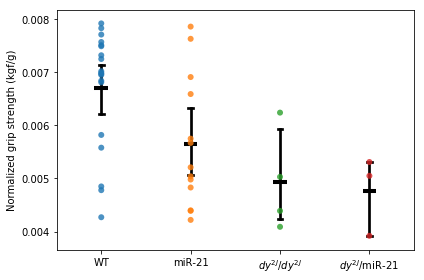

In [13]:
# Visualise
sns.pointplot(x='genotype', y='strength', data=grip, join=False, color='k', markers=['_', '_'], scale=2, capsize=0.05)
sns.stripplot(x='genotype', y='strength', data=grip, size=6, alpha=0.8)
plt.ylabel('Normalized grip strength (kgf/g)')
plt.xlabel('')
plt.xticks(range(4), ticks2j)
plt.tight_layout()
plt.show()